# 🌳 Classificação de Spam com Árvore de Decisão

Este notebook explora um novo algoritmo de aprendizado supervisionado: a **Árvore de Decisão**. Com ele, podemos ver como o modelo toma suas decisões com base nas características dos e-mails, sem depender de probabilidades.

O fluxo de trabalho será:
1.  Preparar os dados e dividi-los.
2.  Treinar um modelo de Árvore de Decisão.
3.  Fazer as previsões e avaliar o desempenho.
4.  (Bônus!) Visualizar a árvore de decisões para entender sua lógica.

In [1]:
### 1. Importar e Preparar os Dados

# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Para visualização da árvore
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# Criar o DataFrame com os dados da sua tabela
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_palavras_suspeitas': [8, 0, 4, 2, 10, 1, 6, 3, 9, 0],
    'tamanho_email': [500, 120, 300, 250, 800, 150, 400, 200, 600, 100],
    'tem_link': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'rotulo': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Separar características (X) e rótulo (y)
X = df[['n_palavras_suspeitas', 'tamanho_email', 'tem_link']]
y = df['rotulo']

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

print("Etapas de preparação concluídas.")

Etapas de preparação concluídas.


### 2. Treinar o Modelo de Árvore de Decisão

Vamos instanciar e treinar o modelo. Para evitar que a árvore fique complexa demais com poucos dados, usaremos o parâmetro `max_depth` para limitar sua profundidade.

In [3]:
# Instanciar o modelo de Árvore de Decisão
# max_depth=3 limita a profundidade da árvore, prevenindo overfitting
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treinar o modelo
modelo_arvore.fit(X_treino, y_treino)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


### 3. Fazer Previsões e Avaliar o Desempenho

Vamos testar o modelo nos dados de teste e verificar as métricas que já conhecemos.

In [4]:
# Fazer previsões nos dados de teste
previsoes_arvore = modelo_arvore.predict(X_teste)

# Avaliar as previsões
acuracia_arvore = accuracy_score(y_teste, previsoes_arvore)
matriz_arvore = confusion_matrix(y_teste, previsoes_arvore)
relatorio_arvore = classification_report(y_teste, previsoes_arvore, target_names=['Não Spam', 'Spam'])

print(f"\nAcurácia do modelo de Árvore de Decisão: {acuracia_arvore:.2f}")
print("\nMatriz de Confusão (Árvore de Decisão):")
print(matriz_arvore)
print("\nRelatório de Classificação (Árvore de Decisão):")
print(relatorio_arvore)


Acurácia do modelo de Árvore de Decisão: 0.33

Matriz de Confusão (Árvore de Decisão):
[[0 2]
 [0 1]]

Relatório de Classificação (Árvore de Decisão):
              precision    recall  f1-score   support

    Não Spam       0.00      0.00      0.00         2
        Spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4. (Bônus!) Visualizar a Árvore de Decisão

Esta é a melhor parte! Podemos visualizar a árvore para entender como ela tomou suas decisões.

(Se a visualização não funcionar no seu ambiente, você pode copiar o código da célula e usar uma ferramenta online como [webgraphviz.com](http://www.webgraphviz.com/))

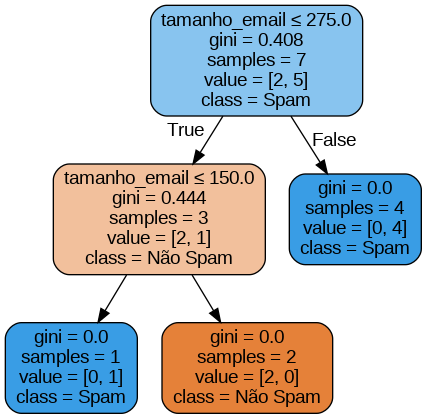

In [5]:
dot_data = export_graphviz(
    modelo_arvore,
    out_file=None,
    feature_names=X.columns,
    class_names=['Não Spam', 'Spam'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("arvore_decisao_spam")

# Exibir a imagem gerada
Image(filename='arvore_decisao_spam.png')